In [2]:
# import packages
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

**来源**: Draine 2008, Physics of the Interstellar and Intergalactic Medium

# 尘埃的辐射加热速率

光学或紫外波段的光子打到尘埃上后有一定的几率被吸收，被吸收的能量多半转为尘埃颗粒的热能，或者转换成光电子或荧光的能量。忽略后两种可能性，尘埃吸收辐射能量的速率为
\begin{equation}
\left(\frac{dE}{dt}\right)_\text{abs} = \int \frac{u_\nu d\nu}{h\nu}\times c\times h\nu \times Q_\text{abs}(\nu)\pi a^2,
\end{equation}
其中$a$是尘埃半径，${u_\nu d\nu}/{h\nu}$是频率$\nu$处的光子数密度，$Q_\text{abs}(\nu)$是频率$\nu$处的吸收效率。

---
另：单位体积的吸收截面是$Q_{\text{abs},a}(\nu)\pi a^2\times n_\text{H}m_\text{H}\eta\times
\left(\frac{4}{3}\pi a^3 \rho_\text{d} \right)^{-1} 
\propto Q_{\text{abs},a}(\nu)/a$，其中$\eta$是尘埃-气体质量比。

---

为了方便，定义光谱平均吸收效率
\begin{equation}
\langle Q_\text{abs}\rangle_\star \equiv \frac{\int d\nu\; u_{\star\nu} Q_\text{abs}(\nu)}{u_\star},
\end{equation}
这里$u_\star\equiv\int d\nu\; u_{\star\nu}$。于是辐射加热速率可以写为
\begin{equation}
\left(\frac{dE}{dt}\right)_\text{abs} = \langle Q_\text{abs}\rangle_\star\pi a^2 u_\star c.
\end{equation}
符号$\star$表示辐射源是以星光为主的星际背景辐射场 (ISRF)。通过数值计算得到下述近似关系
\begin{align}
\langle Q\rangle_\text{ISRF}
&\approx 0.18 \left(a/0.1\;\mu\text{m}\right)^{0.6},\ \text{silicate},\ 0.01\le a\le 1\mu\text{m},\\
&\approx 0.8 \left(a/0.1\;\mu\text{m}\right)^{0.85},\ \text{graphite},\ 0.005\le a\le 0.15\mu\text{m}.
\end{align}
背景星光辐射能量密度是
\begin{equation}
u_\star = 1.05\times 10^{-12} U\;\text{erg}\,\text{cm}^{-3}.
\end{equation}
对于标准ISRF，$U=1$。

In [23]:
# Define: dust heating rate by radiation

def heating_dust_by_radiation(a_micron=None, U_ISRF=None, dust_type=None, **kargs):
    Q = {'silicate': 0.18 * np.power(a_micron/0.1, 0.6),
         'graphote': 0.8 * np.power(a_micron/0.1, 0.85)}[dust_type]
    c = 2.99792458e10
    u_star = U_ISRF * 1.05e-12
    return Q * (np.pi * (a_micron*1e-4)**2) * u_star * c

# 气体分子碰撞尘埃导致的加热率

\begin{equation}
\left(\frac{dE}{dt}\right)_\text{gas} = 2k (T_\text{gas} - T_\text{dust})\; \pi a^2\; \sum_i n_i \left(\frac{8 k T_\text{gas}}{\pi m_i}\right)^{1/2} \alpha_i,
\end{equation}
这里的求和是对各种气体分子求和。$\alpha_i$是各种分子把能量传递给尘埃的效率，一般假定为1的量级 (比如0.5)。

---
另：设气体分子速度大小的概率密度函数为$p(\mathbf{v})$，则单位时间打到尘埃表面单位面积的$i$类分子的总动能是
$$n_i\int_{0}^{\pi/2} d\theta \int_{0}^{\infty}dv\; 2\pi\sin\theta\cos\theta \frac{1}{2}m v^2\times v^3\times \left(2\pi k T/m_i\right)^{-3/2}\exp\left[-\frac{m_i v^2}{2kT}\right]$$

---

只考虑氢和氦的贡献，假定$n(\text{He})/n_\text{H}=0.1$，并忽略$-T_\text{dust}$的部分，则
\begin{equation}
\left(\frac{dE}{dt}\right)_\text{gas} = 1.05\times n_\text{H}\times \left(\frac{8 k T_\text{gas}}{\pi m_\text{H}}\right)^{1/2} \pi a^2\times \alpha \times 2k T_\text{gas},
\end{equation}
于是
\begin{align}
\frac{\left({dE}/{dt}\right)_\text{gas}}{\left({dE}/{dt}\right)_\text{abs}}
&= \frac{1.05\times n_\text{H}\times \left({8 k T_\text{gas}}/{\pi m_\text{H}}\right)^{1/2} \times \alpha \times 2k T_\text{gas}}{\langle Q_\text{abs}\rangle_\star u_\star c} \\
&= \frac{3.8\times 10^{-6}}{U} \frac{\alpha_\text{H}}{\langle Q_\text{abs}\rangle_\star} \left(\frac{n_\text{H}}{30\;\text{cm}^{-3}}\right) \left(\frac{T_\text{gas}}{100\;\text{K}}\right)^{3/2}.
\end{align}

In [11]:
# Define: dust heating rate by collision with gas molecules

def heating_dust_by_gas_collision(a_micron=None, n_H=None, Tgas=None, Tdust=None,
                                  alpha=0.5, He2H_ratio=0.1, **kargs):
    m_H = 1.67e-24
    k_B = 1.38e-16
    v = np.sqrt(8*k_B*Tgas/(np.pi*m_H))
    return ((1+He2H_ratio*0.5) * n_H * v * (np.pi * (a_micron*1e-4)**2)
            * alpha * 2*k_B * (Tgas - Tdust))

# 尘埃的辐射冷却速率

尘埃的辐射冷却率是
\begin{equation}
\left(\frac{dE}{dt}\right)_\text{emiss}
= \int d\nu\; 4\pi B_\nu(T_\text{D})C_\text{abs}(\nu) = 4\pi a^2\langle Q_\text{abs}\rangle_{T_\text{d}} \sigma T_\text{d}^4,
\end{equation}
其中$a$是尘埃半径，$T_\text{d}$是尘埃温度，$Q_\text{abs}$是尘埃的辐射效率，需要基于$T_\text{d}$对应的辐射光谱进行平均，即
\begin{equation}
\langle Q_\text{abs}\rangle_{T_\text{d}} \equiv \frac{\int d\nu B_\nu(T) Q_\text{abs}(\nu)}{\int d\nu B_\nu(T)}.
\end{equation}
假定$Q_\text{abs}(\nu)$可以表示成幂律形式
\begin{equation}
Q_\text{abs}(\nu) = Q_0 \left(\nu/\nu_0\right)^\beta,
\end{equation}
则普朗克平均为
\begin{equation}
\langle Q\rangle = \frac{15}{\pi^4}\Gamma(4+\beta)\zeta(4+\beta)Q_0\left(\frac{kT}{h\nu_0}\right)^\beta.
\end{equation}
对于波长较长的波段，有下述近似公式 (书中图24.1)
\begin{align}
Q_\text{abs} &\approx
1.4\times 10^{-3}
\left(\frac{a}{0.1\;\mu\text{m}}\right)
\left(\frac{\lambda}{100\;\mu\text{m}}\right)^{-2},\ \text{silicate},\ \lambda\ge20\mu\text{m}, \\
&\approx 1.0\times 10^{-3}
\left(\frac{a}{0.1\;\mu\text{m}}\right)
\left(\frac{\lambda}{100\;\mu\text{m}}\right)^{-2},\ \text{graphite},\ \lambda\ge30\mu\text{m}.
\end{align}
由此得到近似的普朗克平均为
\begin{align}
\langle Q_\text{abs}\rangle_T &\approx
1.3\times 10^{-6}
\left(\frac{a}{0.1\;\mu\text{m}}\right)
\left(\frac{T}{\text{K}}\right)^{2},\ \text{silicate},\ \lambda\ge20\mu\text{m}, \\
&\approx 8\times 10^{-7}
\left(\frac{a}{0.1\;\mu\text{m}}\right)
\left(\frac{T}{\text{K}}\right)^{2},\ \text{graphite},\ \lambda\ge30\mu\text{m}.
\end{align}

In [13]:
# Define: dust heating rate by radiation

def cooling_dust_by_radiation(a_micron=None, Tdust=None, dust_type=None, **kargs):
    Q = {'silicate': 1.38e-6 * (a_micron/0.1) * Tdust**2,
         'graphote': 8e-7 * (a_micron/0.1) * Tdust**2}[dust_type]
    sigma_SB = 5.67e-5
    return Q * (4*np.pi * (a_micron*1e-4)**2) * sigma_SB * Tdust**4

# 尘埃的平衡温度

一个尘埃颗粒所包含的能量的变化率是
\begin{equation}
\left(\frac{dE}{dt}\right)_\text{net} = \left(\frac{dE}{dt}\right)_\text{abs}
+ \left(\frac{dE}{dt}\right)_\text{gas} - \left(\frac{dE}{dt}\right)_\text{emiss}.
\end{equation}

并不清楚星际尘埃的热容是多少，作为数量级估计，假定其内能为 (Dulong–Petit定律)
\begin{equation}
E = 3 N k T_\text{d} = 3\times \frac{4\pi}{3} a^3 \rho_\text{d} \frac{1}{m_\text{d}} k T_\text{d},
\end{equation}
其中$\rho_\text{d}$是尘埃物质的密度，$m_\text{d}$是尘埃中单个分子的质量。

于是得到
\begin{equation}
\left(\frac{d T_\text{d}}{d t}\right) = \left(4\pi a^3 \frac{\rho_\text{d}}{m_\text{d}} k\right)^{-1} \left[\left(\frac{dE}{dt}\right)_\text{abs}
+ \left(\frac{dE}{dt}\right)_\text{gas} - \left(\frac{dE}{dt}\right)_\text{emiss}\right].
\end{equation}

注意到，由于$\left(\frac{dE}{dt}\right)_\text{emiss}$正比于$a^3$，所以冷却时标与$a$无关。只考虑冷却项，可得
\begin{equation}
\left(\frac{d T_\text{d}}{d t}\right) = -b\times \sigma T_\text{d}^6\times \frac{m_\text{d}}{\rho_\text{d} k},
\end{equation}
这里$b = C \times (0.1\;\mu m)^{-1}(\text{K})^{-2}$，$C$是前面$\langle Q_\text{abs}\rangle_T$的公式里的系数。

In [43]:
# Define: dust heating rate by radiation

def heating_cooling_dust(t, Tdust, kargs):
    m_H = 1.67e-24
    k_B = 1.38e-16
    f = (4*np.pi*(kargs['a_micron']*1e-4)**3 * kargs['rho_d'] /
         (kargs['md_amu']*m_H) * k_B)
    return (heating_dust_by_radiation(**kargs) + 
            heating_dust_by_gas_collision(Tdust=Tdust, **kargs) -
            cooling_dust_by_radiation(Tdust=Tdust, **kargs)) / f

In [78]:
# Define: solve the ode for Td

def solve_Td(t0=0.0, dt=1e-4, dt_ratio=1.2, prec=1e-6, tmax=1e10,
             Tdust_0=100.0, kargs=None):
    y_prev=Tdust_0
    res = [(t0, Tdust_0)]

    s = (ode(heating_cooling_dust).
         set_integrator('zvode').
         set_initial_value(Tdust_0, t=t0).
         set_f_params(kargs))

    while s.t < tmax:
        s.integrate(s.t + dt)
        dt = dt * dt_ratio
        res.append((s.t, s.y[0].real))
        if np.abs(s.y - y_prev) < np.abs(y_prev)* prec:
            break
        y_prev = s.y

    res = [_ for _ in zip(*res)]
    return res

In [79]:
kargs = {
    'a_micron': 0.1,
    'rho_d': 2.0,
    'md_amu': 30.0,
    'U_ISRF': 1.0,
    'dust_type': 'silicate',
    'Tgas': 60.0,
    'n_H': 1e3,
}

<IPython.core.display.Javascript object>


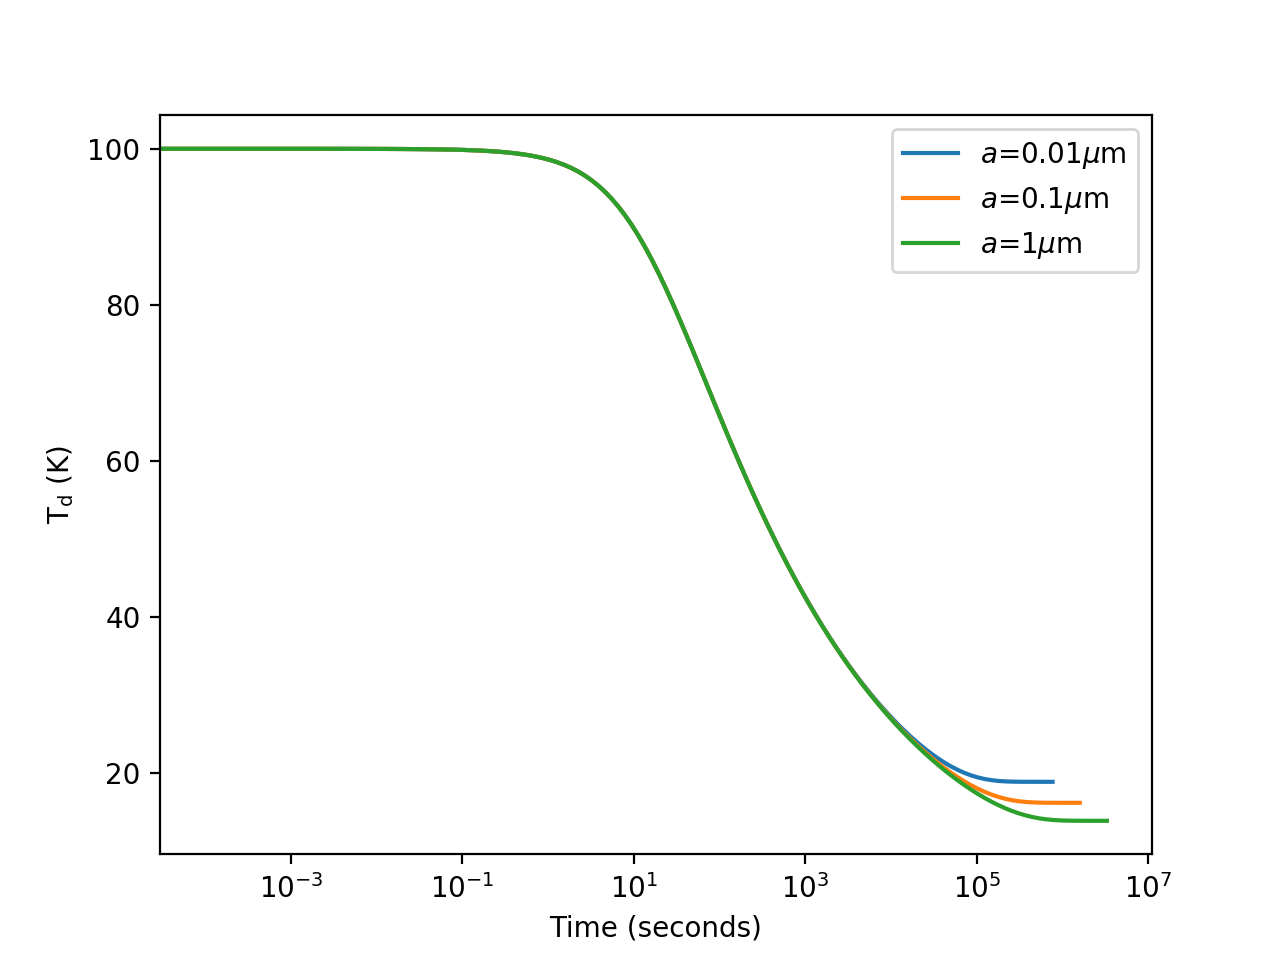

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xscale('log')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('T$_{\\rm d}$ (K)')

for a in [0.01, 0.1, 1]:
    kargs['a_micron'] = a
    res = solve_Td(kargs=kargs)
    ax.plot(res[0], res[1], label='$a$={:}$\mu$m'.format(a))

ax.legend()
None